In [1]:
#magic command to display matplotlib plots 
%matplotlib inline

In [2]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json

# Import the BLS Data API key
from api_keys import api_key
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
# Store file paths in a variable
occupation_data_file = Path("Resources/national_M2022_dl.xlsx")
employment_data_file = Path("Resources/occupation.xlsx")
automation_file = Path("Resources/automation_data_by_state.csv")
occupation_gender_file = Path("Resources/cpsaat11.xlsx")

In [4]:
# Read the files into dataframes
occupation_group_data = pd.read_excel(occupation_data_file)
employment_data_df = pd.read_excel(employment_data_file, sheet_name ="Table 1.7",header=1)
factors_utilization= pd.read_excel(employment_data_file, sheet_name ="Table 1.12",header=1)
automation_data = pd.read_csv(automation_file, encoding="ISO-8859-1")
occupation_gender_df = pd.read_excel(occupation_gender_file,header=None)

In [5]:
# Sample data of occupation_group_data dataframe
occupation_group_data.sample(5)

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
181,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,17-2030,Bioengineers and Biomedical Engineers,...,47.86,62.13,76.51,63420,78500,99550,129230,159130,NaN,NaN
1263,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,51-8092,Gas Plant Operators,...,38.2,45.64,51.78,46190,62220,79460,94930,107700,NaN,NaN
505,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,27-4032,Film and Video Editors,...,30.54,47.09,80.16,36930,46800,63520,97960,166730,NaN,NaN
211,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,17-3000,"Drafters, Engineering Technicians, and Mapping...",...,29.37,37.36,46.44,38050,47760,61090,77720,96600,NaN,NaN
271,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,19-3034,School Psychologists,...,39.18,49.95,61.92,53040,64880,81500,103890,128800,NaN,NaN


In [6]:
# Columns
occupation_group_data.columns

Index(['AREA', 'AREA_TITLE', 'AREA_TYPE', 'PRIM_STATE', 'NAICS', 'NAICS_TITLE',
       'I_GROUP', 'OWN_CODE', 'OCC_CODE', 'OCC_TITLE', 'O_GROUP', 'TOT_EMP',
       'EMP_PRSE', 'JOBS_1000', 'LOC_QUOTIENT', 'PCT_TOTAL', 'PCT_RPT',
       'H_MEAN', 'A_MEAN', 'MEAN_PRSE', 'H_PCT10', 'H_PCT25', 'H_MEDIAN',
       'H_PCT75', 'H_PCT90', 'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75',
       'A_PCT90', 'ANNUAL', 'HOURLY'],
      dtype='object')

In [7]:
# Select the requred columns-'OCC_CODE', 'OCC_TITLE', 'O_GROUP'
occupation_group_data = occupation_group_data[['OCC_CODE', 'OCC_TITLE', 'O_GROUP']]

In [8]:
# Rename the columns
occupation_group_data.rename(columns={'OCC_CODE':"2022 National Employment Matrix code",'OCC_TITLE' : "2022 National Employment Matrix title",'O_GROUP':"Occupation Group" },inplace=True)


In [9]:
# Count of each column items
occupation_group_data.count()

2022 National Employment Matrix code     1402
2022 National Employment Matrix title    1402
Occupation Group                         1402
dtype: int64

In [10]:
# Check for duplicate records
occupation_group_data.duplicated().sample(5)

998     False
594     False
35      False
1229    False
946     False
dtype: bool

In [11]:
# Reset the index of employment_data_df dataframe
employment_data_df.reset_index()
employment_data_df.head()

,2022 National Employment Matrix title,2022 National Employment Matrix code,Occupation type,"Employment, 2022","Employment, 2032","Employment change, numeric, 2022-32","Employment change, percent, 2022-32","Percent self employed, 2022","Occupational openings, 2022-32 annual average","Median annual wage, 2022(1)",Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation
0,"Total, all occupations",00-0000,Summary,164482.6,169148.1,4665.5,2.8,6,18566.5,46310,—,—,—
1,Management occupations,11-0000,Summary,12574.7,13257.7,683.0,5.4,15.8,1053.1,107360,—,—,—
2,Top executives,11-1000,Summary,3832.2,3958.0,125.8,3.3,1.8,315.0,99890,—,—,—
3,Chief executives,11-1011,Line item,280.0,257.0,-23.0,-8.2,21.2,15.3,189520,Bachelor's degree,5 years or more,NaN
4,General and operations managers,11-1021,Line item,3507.8,3655.1,147.3,4.2,0.3,296.3,98100,Bachelor's degree,5 years or more,NaN


In [12]:
# Display the columns
employment_data_df.columns

Index(['2022 National Employment Matrix title',
       '2022 National Employment Matrix code', 'Occupation type',
       'Employment, 2022', 'Employment, 2032',
       'Employment change, numeric, 2022-32',
       'Employment change, percent, 2022-32', 'Percent self employed, 2022',
       'Occupational openings, 2022-32 annual average',
       'Median annual wage, 2022(1)', 'Typical education needed for entry',
       'Work experience in a related occupation',
       'Typical on-the-job training needed to attain competency in the occupation'],
      dtype='object')

In [13]:
# Count of each column items
employment_data_df.count()

2022 National Employment Matrix title                                        1117
2022 National Employment Matrix code                                         1113
Occupation type                                                              1113
Employment, 2022                                                             1113
Employment, 2032                                                             1113
Employment change, numeric, 2022-32                                          1113
Employment change, percent, 2022-32                                          1113
Percent self employed, 2022                                                  1113
Occupational openings, 2022-32 annual average                                1113
Median annual wage, 2022(1)                                                  1104
Typical education needed for entry                                           1113
Work experience in a related occupation                                       394
Typical on-the-j

In [14]:
# Remove the footer in the last 4 lines
employment_data_df = employment_data_df.drop(employment_data_df.index[-4:], axis=0)
employment_data_df.tail()

,2022 National Employment Matrix title,2022 National Employment Matrix code,Occupation type,"Employment, 2022","Employment, 2032","Employment change, numeric, 2022-32","Employment change, percent, 2022-32","Percent self employed, 2022","Occupational openings, 2022-32 annual average","Median annual wage, 2022(1)",Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation
1108,"Pump operators, except wellhead pumpers",53-7072,Line item,11.2,11.6,0.4,3.6,—,1.2,55860,High school diploma or equivalent,NaN,Moderate-term on-the-job training
1109,Wellhead pumpers,53-7073,Line item,16.2,15.9,-0.4,-2.2,0.4,1.6,63280,High school diploma or equivalent,Less than 5 years,Moderate-term on-the-job training
1110,Refuse and recyclable material collectors,53-7081,Line item,146.4,151.1,4.7,3.2,7.6,18.6,43540,No formal educational credential,NaN,Short-term on-the-job training
1111,"Tank car, truck, and ship loaders",53-7121,Line item,13.3,13.5,0.2,1.6,3.3,1.6,53930,No formal educational credential,NaN,Short-term on-the-job training
1112,"Material moving workers, all other",53-7199,Line item,26.1,27.0,0.9,3.5,3.1,3.2,38800,No formal educational credential,NaN,Short-term on-the-job training


In [15]:
# Count of each column items
employment_data_df.count()

2022 National Employment Matrix title                                        1113
2022 National Employment Matrix code                                         1113
Occupation type                                                              1113
Employment, 2022                                                             1113
Employment, 2032                                                             1113
Employment change, numeric, 2022-32                                          1113
Employment change, percent, 2022-32                                          1113
Percent self employed, 2022                                                  1113
Occupational openings, 2022-32 annual average                                1113
Median annual wage, 2022(1)                                                  1104
Typical education needed for entry                                           1113
Work experience in a related occupation                                       394
Typical on-the-j

In [16]:
# Select the required columns - 2022 National Employment Matrix occupation code ,Factors affecting occupational utilization
factors_utilization =  factors_utilization[['2022 National Employment Matrix occupation code','Factors affecting occupational utilization']]

In [17]:
factors_utilization.head()


,2022 National Employment Matrix occupation code,Factors affecting occupational utilization
0,11-1011,Productivity change - share decreases as chang...
1,11-2011,Productivity change - share decreases as conso...
2,11-2021,Productivity change - share decreases as conso...
3,11-2021,Demand change - share increases as an expected...
4,11-2022,Demand change - share decreases as growth in o...


In [18]:
# Rename Columns
factors_utilization.rename(columns={'2022 National Employment Matrix occupation code':'2022 National Employment Matrix code'},inplace = True)

In [19]:
# Remove duplicate records
factors_utilization = factors_utilization.drop_duplicates(subset='2022 National Employment Matrix code', keep='first')

In [20]:
# Merge the dataframes
employment_details = pd.merge(employment_data_df,factors_utilization,on ='2022 National Employment Matrix code',how="left")

In [21]:
# Remove the duplicate records
employment_details = employment_details.drop_duplicates(subset="2022 National Employment Matrix code",keep='last')

In [22]:
# Count
employment_details.count()

2022 National Employment Matrix title                                        1113
2022 National Employment Matrix code                                         1113
Occupation type                                                              1113
Employment, 2022                                                             1113
Employment, 2032                                                             1113
Employment change, numeric, 2022-32                                          1113
Employment change, percent, 2022-32                                          1113
Percent self employed, 2022                                                  1113
Occupational openings, 2022-32 annual average                                1113
Median annual wage, 2022(1)                                                  1104
Typical education needed for entry                                           1113
Work experience in a related occupation                                       394
Typical on-the-j

In [23]:
# merge the occupation_group_data and employment_data_df dataframes
employment_wage_education = pd.merge(occupation_group_data,employment_details,on= ["2022 National Employment Matrix code","2022 National Employment Matrix code"])
employment_wage_education.head()

,2022 National Employment Matrix code,2022 National Employment Matrix title_x,Occupation Group,2022 National Employment Matrix title_y,Occupation type,"Employment, 2022","Employment, 2032","Employment change, numeric, 2022-32","Employment change, percent, 2022-32","Percent self employed, 2022","Occupational openings, 2022-32 annual average","Median annual wage, 2022(1)",Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation,Factors affecting occupational utilization
0,00-0000,All Occupations,total,"Total, all occupations",Summary,164482.6,169148.1,4665.5,2.8,6,18566.5,46310,—,—,—,NaN
1,11-0000,Management Occupations,major,Management occupations,Summary,12574.7,13257.7,683.0,5.4,15.8,1053.1,107360,—,—,—,NaN
2,11-1000,Top Executives,minor,Top executives,Summary,3832.2,3958.0,125.8,3.3,1.8,315.0,99890,—,—,—,NaN
3,11-1011,Chief Executives,detailed,Chief executives,Line item,280.0,257.0,-23.0,-8.2,21.2,15.3,189520,Bachelor's degree,5 years or more,NaN,Productivity change - share decreases as chang...
4,11-1021,General and Operations Managers,detailed,General and operations managers,Line item,3507.8,3655.1,147.3,4.2,0.3,296.3,98100,Bachelor's degree,5 years or more,NaN,NaN


In [24]:
employment_wage_education.count()

2022 National Employment Matrix code                                         1117
2022 National Employment Matrix title_x                                      1117
Occupation Group                                                             1117
2022 National Employment Matrix title_y                                      1117
Occupation type                                                              1117
Employment, 2022                                                             1117
Employment, 2032                                                             1117
Employment change, numeric, 2022-32                                          1117
Employment change, percent, 2022-32                                          1117
Percent self employed, 2022                                                  1117
Occupational openings, 2022-32 annual average                                1117
Median annual wage, 2022(1)                                                  1110
Typical educatio

In [25]:
# Drop the 2022 National Employment Matrix title_y column
employment_wage_education = employment_wage_education.drop("2022 National Employment Matrix title_y",axis=1)

# Rename the column 2022 National Employment Matrix title_x to 2022 National Employment Matrix title
employment_wage_education.rename(columns={"2022 National Employment Matrix title_x":"2022 National Employment Matrix title"},inplace = True)

In [26]:
# Count
employment_wage_education.count()

2022 National Employment Matrix code                                         1117
2022 National Employment Matrix title                                        1117
Occupation Group                                                             1117
Occupation type                                                              1117
Employment, 2022                                                             1117
Employment, 2032                                                             1117
Employment change, numeric, 2022-32                                          1117
Employment change, percent, 2022-32                                          1117
Percent self employed, 2022                                                  1117
Occupational openings, 2022-32 annual average                                1117
Median annual wage, 2022(1)                                                  1110
Typical education needed for entry                                           1117
Work experience 

In [27]:
# Display some sample data of automation_data dataframe
automation_data.sample(5)

,SOC,Occupation,Probability,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
558,51-2091,Fiberglass Laminators and Fabricators,0.9300,720,40,40,390,1290,0,0,...,760,510,1780,110,0,120,980,0,440,0
205,27-1027,Set and Exhibit Designers,0.0055,50,0,100,0,3420,60,170,...,0,120,530,50,0,240,160,0,110,0
272,29-9012,Occupational Health and Safety Technicians,0.2500,100,100,260,180,1290,210,140,...,0,550,3150,170,0,390,470,110,260,70
251,29-1199,Health Diagnosing and Treating Practitioners; ...,0.0200,0,200,470,130,3670,940,340,...,50,370,1310,150,120,330,1180,110,520,40
422,43-6013,Medical Secretaries,0.8100,5130,1410,13840,3430,73310,6950,3930,...,140,8840,96290,3540,960,5200,8420,1390,5350,1510


In [28]:
# Rename the columns "SOC" to "2022 National Employment Matrix code" and "Probability" to "Automation Probability"
automation_data.rename(columns={"SOC":"2022 National Employment Matrix code","Probability":"Automation Probability"},inplace =True) 

In [29]:
automation_data = automation_data[["2022 National Employment Matrix code","Automation Probability"]]

In [30]:
# Merge the employment_wage_education and automation_data dataframes
occupation_automation_df = pd.merge(employment_wage_education,automation_data,how="left",on=["2022 National Employment Matrix code","2022 National Employment Matrix code"])
occupation_automation_df.head()

,2022 National Employment Matrix code,2022 National Employment Matrix title,Occupation Group,Occupation type,"Employment, 2022","Employment, 2032","Employment change, numeric, 2022-32","Employment change, percent, 2022-32","Percent self employed, 2022","Occupational openings, 2022-32 annual average","Median annual wage, 2022(1)",Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation,Factors affecting occupational utilization,Automation Probability
0,00-0000,All Occupations,total,Summary,164482.6,169148.1,4665.5,2.8,6,18566.5,46310,—,—,—,NaN,NaN
1,11-0000,Management Occupations,major,Summary,12574.7,13257.7,683.0,5.4,15.8,1053.1,107360,—,—,—,NaN,NaN
2,11-1000,Top Executives,minor,Summary,3832.2,3958.0,125.8,3.3,1.8,315.0,99890,—,—,—,NaN,NaN
3,11-1011,Chief Executives,detailed,Line item,280.0,257.0,-23.0,-8.2,21.2,15.3,189520,Bachelor's degree,5 years or more,NaN,Productivity change - share decreases as chang...,0.015
4,11-1021,General and Operations Managers,detailed,Line item,3507.8,3655.1,147.3,4.2,0.3,296.3,98100,Bachelor's degree,5 years or more,NaN,NaN,0.160


In [31]:
# Display the count of column items
occupation_automation_df.count()

2022 National Employment Matrix code                                         1117
2022 National Employment Matrix title                                        1117
Occupation Group                                                             1117
Occupation type                                                              1117
Employment, 2022                                                             1117
Employment, 2032                                                             1117
Employment change, numeric, 2022-32                                          1117
Employment change, percent, 2022-32                                          1117
Percent self employed, 2022                                                  1117
Occupational openings, 2022-32 annual average                                1117
Median annual wage, 2022(1)                                                  1110
Typical education needed for entry                                           1117
Work experience 

In [32]:
# sample data of occupation_gender_df dataframe
occupation_gender_df.reset_index()

occupation_gender_df.head()

,0,1,2,3,4,5,6,7
0,NaN,HOUSEHOLD DATA\nANNUAL AVERAGES\n11. Employed ...,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,[Numbers in thousands],NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Occupation,2022,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,Total\nemployed,Percent of total employed,NaN,NaN,NaN,NaN


In [33]:
# Exculde the header rows
occupation_gender_df = occupation_gender_df.iloc[9:]

In [34]:
# Name columns
occupation_gender_df.columns = ["2022 National Employment Matrix code","2022 National Employment Matrix title","Total employed", "Women","White","Black or African American","Asian","Hispanic or Latino"]

In [35]:
# Merge occupation_automation_df,occupation_gender_df dataframes
occupation_data_complete = pd.merge(occupation_automation_df,occupation_gender_df,how = "left",on="2022 National Employment Matrix code")


In [36]:
occupation_data_complete.columns

Index(['2022 National Employment Matrix code',
       '2022 National Employment Matrix title_x', 'Occupation Group',
       'Occupation type', 'Employment, 2022', 'Employment, 2032',
       'Employment change, numeric, 2022-32',
       'Employment change, percent, 2022-32', 'Percent self employed, 2022',
       'Occupational openings, 2022-32 annual average',
       'Median annual wage, 2022(1)', 'Typical education needed for entry',
       'Work experience in a related occupation',
       'Typical on-the-job training needed to attain competency in the occupation',
       'Factors affecting occupational utilization', 'Automation Probability',
       '2022 National Employment Matrix title_y', 'Total employed', 'Women',
       'White', 'Black or African American', 'Asian', 'Hispanic or Latino'],
      dtype='object')

In [37]:
# Drop the 2022 National Employment Matrix title_y column
occupation_data_complete = occupation_data_complete.drop("2022 National Employment Matrix title_y",axis=1)

# Rename the column 2022 National Employment Matrix title_x to 2022 National Employment Matrix title
occupation_data_complete.rename(columns={"2022 National Employment Matrix title_x":"2022 National Employment Matrix title"},inplace = True)

In [38]:
occupation_data_complete["Median annual wage, 2022(1)"]=pd.to_numeric(occupation_data_complete["Median annual wage, 2022(1)"])

In [39]:
occupation_data_complete.head()

,2022 National Employment Matrix code,2022 National Employment Matrix title,Occupation Group,Occupation type,"Employment, 2022","Employment, 2032","Employment change, numeric, 2022-32","Employment change, percent, 2022-32","Percent self employed, 2022","Occupational openings, 2022-32 annual average",...,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation,Factors affecting occupational utilization,Automation Probability,Total employed,Women,White,Black or African American,Asian,Hispanic or Latino
0,00-0000,All Occupations,total,Summary,164482.6,169148.1,4665.5,2.8,6,18566.5,...,—,—,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11-0000,Management Occupations,major,Summary,12574.7,13257.7,683.0,5.4,15.8,1053.1,...,—,—,NaN,NaN,20199,40.5,81.6,9,6.6,11.5
2,11-1000,Top Executives,minor,Summary,3832.2,3958.0,125.8,3.3,1.8,315.0,...,—,—,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11-1011,Chief Executives,detailed,Line item,280.0,257.0,-23.0,-8.2,21.2,15.3,...,5 years or more,NaN,Productivity change - share decreases as chang...,0.015,1780,29.2,85.9,5.9,6.7,6.8
4,11-1021,General and Operations Managers,detailed,Line item,3507.8,3655.1,147.3,4.2,0.3,296.3,...,5 years or more,NaN,NaN,0.160,1165,35.4,82.4,9.1,5.3,11.5


In [40]:
# Export file as a CSV, without the Pandas index, but with the header
occupation_data_complete.to_csv("Resources/Occupation_complete.csv", index=False, header=True)

In [41]:
# Create a dataframe for all the major sectors
major_sectors_df= occupation_data_complete.loc[occupation_data_complete['Occupation Group'] == "major" ]
major_sectors_df.count()

2022 National Employment Matrix code                                         22
2022 National Employment Matrix title                                        22
Occupation Group                                                             22
Occupation type                                                              22
Employment, 2022                                                             22
Employment, 2032                                                             22
Employment change, numeric, 2022-32                                          22
Employment change, percent, 2022-32                                          22
Percent self employed, 2022                                                  22
Occupational openings, 2022-32 annual average                                22
Median annual wage, 2022(1)                                                  22
Typical education needed for entry                                           22
Work experience in a related occupation 

In [42]:
Employment_distribution_df =major_sectors_df[["2022 National Employment Matrix title",'Employment, 2022','Employment, 2032']]

Employment_distribution_df["2022 National Employment Matrix title"] = Employment_distribution_df["2022 National Employment Matrix title"].str.replace("Occupations","")
Employment_distribution_df = Employment_distribution_df.set_index("2022 National Employment Matrix title")
Employment_distribution_df

C:\Users\Vinaya Kusuma\AppData\Local\Temp\ipykernel_19596\629189038.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Employment_distribution_df["2022 National Employment Matrix title"] = Employment_distribution_df["2022 National Employment Matrix title"].str.replace("Occupations","")


,"Employment, 2022","Employment, 2032"
2022 National Employment Matrix title,,
Management,12574.7,13257.7
Business and Financial Operations,10591.1,11179.7
Computer and Mathematical,5277.6,6081.4
Architecture and Engineering,2611.8,2746.8
"Life, Physical, and Social Science",1473.7,1563.2
Community and Social Service,2936.5,3164.2
Legal,1362.4,1442.3
Educational Instruction and Library,9354.1,9570.6
"Arts, Design, Entertainment, Sports, and Media",3071.1,3187.0


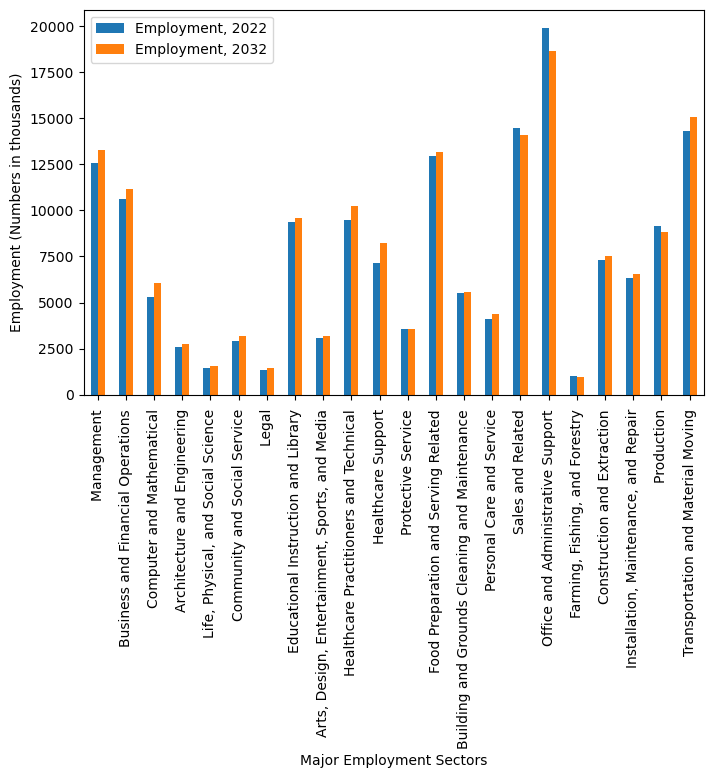

In [43]:
# Plot the employments across the job groups
ax =Employment_distribution_df.plot(kind="bar",xlabel='Major Employment Sectors',ylabel = "Employment (Numbers in thousands)",figsize=(8,5))


In [44]:
# Major job groups
major_sectors_selected = major_sectors_df[["2022 National Employment Matrix title","Employment change, percent, 2022-32"]]
major_sectors_selected=major_sectors_selected.sort_values("Employment change, percent, 2022-32",ascending = False)
major_sectors_selected["2022 National Employment Matrix title"] = major_sectors_selected["2022 National Employment Matrix title"].str.replace("Occupations","") 
top_occ_groups=major_sectors_selected.head(6)
top_occ_groups

top_occ_list = top_occ_groups["2022 National Employment Matrix title"].to_list()
top_occ_values = top_occ_groups["Employment change, percent, 2022-32"].to_list()


In [45]:
major_sectors_selected

,2022 National Employment Matrix title,"Employment change, percent, 2022-32"
499,Healthcare Support,15.4
93,Computer and Mathematical,15.2
414,Healthcare Practitioners and Technical,8.0
234,Community and Social Service,7.8
599,Personal Care and Service,6.1
168,"Life, Physical, and Social Science",6.1
257,Legal,5.9
50,Business and Financial Operations,5.6
1,Management,5.4
1051,Transportation and Material Moving,5.4


In [46]:
bottom_occ_groups = major_sectors_selected.loc[major_sectors_selected["Employment change, percent, 2022-32"]<0]
# .sort_values("Employment change, percent, 2022-32")

bottom_occ_list = bottom_occ_groups["2022 National Employment Matrix title"].to_list()
bottom_occ_values = bottom_occ_groups["Employment change, percent, 2022-32"].to_list()


In [47]:
# Percentage employment Change for all the occupations
percentage_change_all = employment_data_df[employment_data_df["2022 National Employment Matrix code"]=="00-0000"]

In [48]:
merged_occ_list = top_occ_list + bottom_occ_list
merged_values_list = top_occ_values+bottom_occ_values


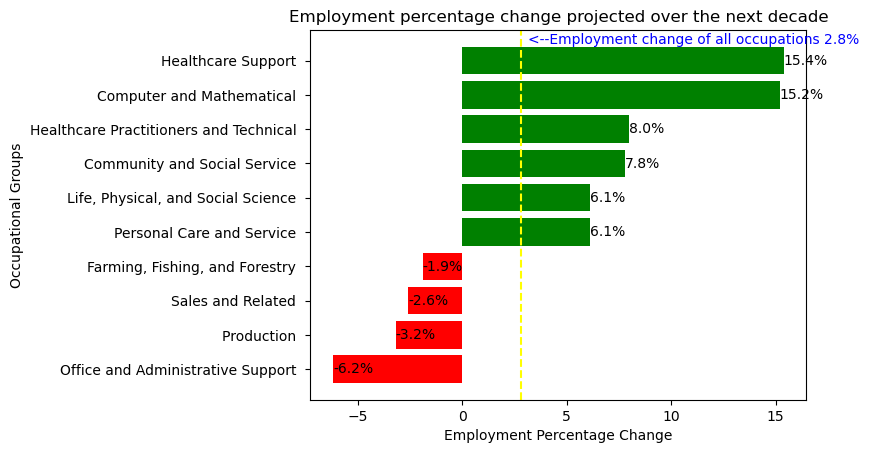

In [49]:

data = {'Occupational Groups':merged_occ_list,
        'Percentage Change': merged_values_list}

# Create a sample DataFrame

df = pd.DataFrame(data)

# Sorting in ascending order based on the 'Age' column
df_sorted_ascending = df.sort_values(by='Percentage Change')

# Create a horizontal bar plot with negative values in red
fig, ax = plt.subplots()
colors = ['red' if val < 0 else 'green' for val in df_sorted_ascending['Percentage Change']]
bars = ax.barh(df_sorted_ascending['Occupational Groups'], df_sorted_ascending['Percentage Change'], color=colors)

# Add labels and title
ax.set_xlabel('Employment Percentage Change')
ax.set_ylabel('Occupational Groups')
ax.set_title('Employment percentage change projected over the next decade')

for i, v in enumerate(df_sorted_ascending['Percentage Change'].to_list()):
    label = f"{v}%"
    plt.text(v, i, label, va='center')
    
v_label = f"<--Employment change of all occupations {percentage_change_all.iloc[0,6]}%"
ax.axvline(x=percentage_change_all.iloc[0,6], color='yellow', linestyle='--', label=percentage_change_all.iloc[0,6])
ax.text(19, 9.5,v_label , rotation=0, ha='right',color="blue")

# Show the plot
plt.show()

In [50]:
# Occupations that are highly impacted by automation
occupation_detailed = occupation_data_complete[occupation_data_complete['Occupation Group']=="detailed"]
occupation_detailed.columns
occupation_automation = occupation_detailed[['2022 National Employment Matrix title',"Automation Probability"] ]

occupation_automation.dropna()
occupation_automation_sorted = occupation_automation.sort_values("Automation Probability",ascending=False)
occupation_automation_sorted.head(50)


,2022 National Employment Matrix title,Automation Probability
979,"Sewers, Hand",0.99
1037,Photographic Process Workers and Processing Ma...,0.99
83,Insurance Underwriters,0.99
897,Watch and Clock Repairers,0.99
349,Library Technicians,0.99
269,"Title Examiners, Abstractors, and Searchers",0.99
709,New Accounts Clerks,0.99
677,Telemarketers,0.99
91,Tax Preparers,0.99
716,Cargo and Freight Agents,0.99


In [51]:
# Fastest growing occupations- employment change percenatge > 18%
fastest_growing_occ  =occupation_detailed.loc[occupation_detailed['Employment change, percent, 2022-32'] > 18.0]
fastest_growing_occ_df = fastest_growing_occ[["2022 National Employment Matrix title",'Employment change, percent, 2022-32','Employment change, numeric, 2022-32']]
fastest_growing_occ_top10 = fastest_growing_occ_df.sort_values('Employment change, percent, 2022-32', ascending=False).head(10)

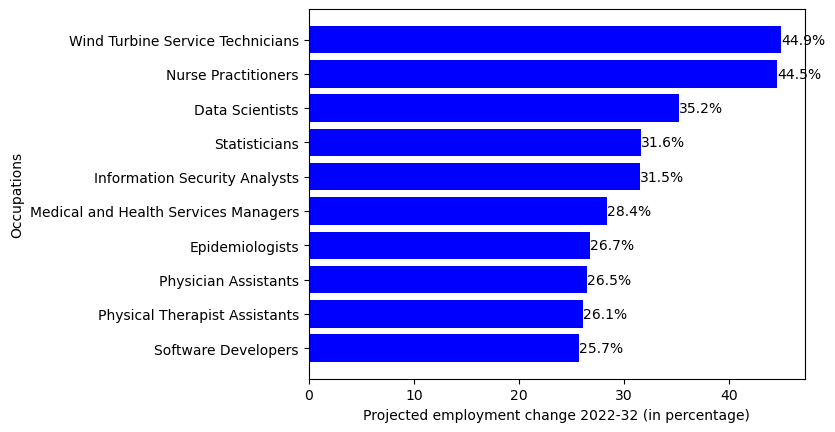

In [52]:

# Create a horizontal bar plot with negative values in red
fastest_growing_occ_top10 = fastest_growing_occ_top10.sort_values(by='Employment change, percent, 2022-32',ascending = True)

plt.barh(fastest_growing_occ_top10["2022 National Employment Matrix title"], fastest_growing_occ_top10['Employment change, percent, 2022-32'], color="blue")

for i, v in enumerate(fastest_growing_occ_top10['Employment change, percent, 2022-32'].to_list()):
    label = f"{v}%"
    plt.text(v, i, label, va='center')

# Add labels and title

plt.xlabel('Projected employment change 2022-32 (in percentage)')
plt.ylabel('Occupations')
# plt.title('Top 10 Fastest Growing Occupations')


# Show the plot
plt.show()


In [53]:
fastest_growing_occ_top10

,2022 National Employment Matrix title,"Employment change, percent, 2022-32","Employment change, numeric, 2022-32"
109,Software Developers,25.7,410.4
512,Physical Therapist Assistants,26.1,26.3
425,Physician Assistants,26.5,39.3
183,Epidemiologists,26.7,2.7
40,Medical and Health Services Managers,28.4,144.7
97,Information Security Analysts,31.5,53.2
118,Statisticians,31.6,10.5
119,Data Scientists,35.2,59.4
440,Nurse Practitioners,44.5,118.6
900,Wind Turbine Service Technicians,44.9,5.0


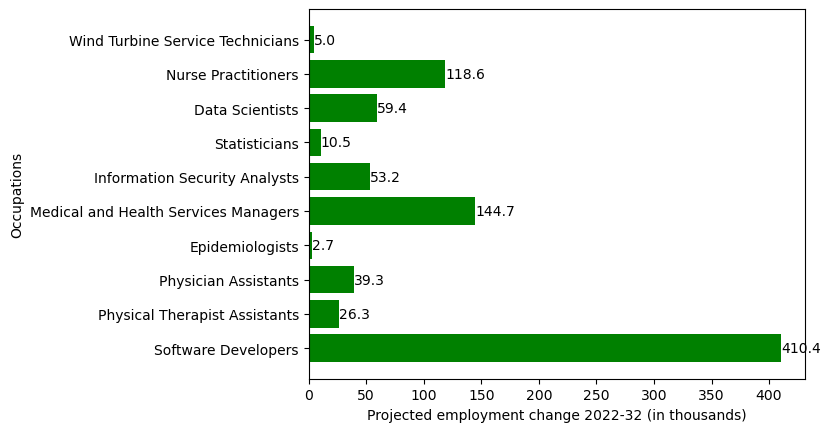

In [54]:

fastest_growing_occ_top10_new = fastest_growing_occ_top10.sort_values(by='Employment change, percent, 2022-32',ascending = True)

plt.barh(fastest_growing_occ_top10_new["2022 National Employment Matrix title"], fastest_growing_occ_top10_new['Employment change, numeric, 2022-32'], color="green")

for i, v in enumerate(fastest_growing_occ_top10_new['Employment change, numeric, 2022-32'].to_list()):
    label = f"{v}"
    plt.text(v, i, label, va='center')

# Add labels and title

plt.xlabel('Projected employment change 2022-32 (in thousands)')
plt.ylabel('Occupations')
# plt.title('Top 10 Fastest Growing Occupations')


# Show the plot
plt.show()

In [55]:
# Fastest growing occupations
fastest_growing_occ_num = fastest_growing_occ[["2022 National Employment Matrix title",'Employment change, numeric, 2022-32','Employment change, percent, 2022-32']]

In [56]:
fastest_growing_occ_num

,2022 National Employment Matrix title,"Employment change, numeric, 2022-32","Employment change, percent, 2022-32"
40,Medical and Health Services Managers,144.7,28.4
65,Logisticians,38.3,18.3
85,Financial Examiners,12.8,19.5
97,Information Security Analysts,53.2,31.5
98,Computer and Information Research Scientists,8.3,22.7
109,Software Developers,410.4,25.7
110,Software Quality Assurance Analysts and Testers,40.8,20.3
115,Actuaries,7.0,23.2
117,Operations Research Analysts,24.7,22.5
118,Statisticians,10.5,31.6


In [57]:
# Fastest declining occupations- employment change percenatge < 0%
fastest_declining_occ  =occupation_detailed.loc[occupation_detailed['Employment change, percent, 2022-32'] < 0.0]
fastest_declining_occ = fastest_declining_occ[["2022 National Employment Matrix title",'Employment change, percent, 2022-32']]
fastest_declining_occ.sort_values('Employment change, percent, 2022-32', ascending=True).head(15)

,2022 National Employment Matrix title,"Employment change, percent, 2022-32"
737,Word Processors and Typists,-38.6
897,Watch and Clock Repairers,-29.8
836,"Roof Bolters, Mining",-28.5
1022,"Cutters and Trimmers, Hand",-28.2
686,Telephone Operators,-26.6
736,Data Entry Keyers,-26.0
685,"Switchboard Operators, Including Answering Ser...",-25.1
954,Foundry Mold and Coremakers,-23.5
973,"Pressers, Textile, Garment, and Related Materials",-21.8
731,Legal Secretaries and Administrative Assistants,-21.8


In [58]:
# base url of BLS Data API
base_url = "https://api.bls.gov/publicAPI/v2/"
# Series Id for job openings in Health care and social assistance
series_id = "JTU620000000000000JOL"

#url
url = f"{base_url}timeseries/data/{series_id}"
params = {
    "startyear": 2010,
    "endyear": 2022,
    "registrationkey": api_key
}

#run a request using our params dictionary
openings_response = requests.get(url, params=params)
# convert response to json
openings_response_json = openings_response.json()

# Print the json
print(json.dumps(openings_response_json ,indent=4, sort_keys=True))


{
    "Results": {
        "series": [
            {
                "data": [
                    {
                        "footnotes": [
                            {}
                        ],
                        "period": "M12",
                        "periodName": "December",
                        "value": "1821",
                        "year": "2022"
                    },
                    {
                        "footnotes": [
                            {}
                        ],
                        "period": "M11",
                        "periodName": "November",
                        "value": "1814",
                        "year": "2022"
                    },
                    {
                        "footnotes": [
                            {}
                        ],
                        "period": "M10",
                        "periodName": "October",
                        "value": "2154",
                        "year": "2022"
      

In [59]:
#store the year and openings data in lists
year_list=[]
data1 = []
# Loop through and parse the JSON to retrieve the job openings data for each year
for i in range(9):
    year_list.append(openings_response_json["Results"]["series"][0]["data"][12*i]['year'])
    data1.append(openings_response_json["Results"]["series"][0]["data"][12*i]['value'])

# Reverse the list to get the data for years in ascending order 
years = year_list[::-1]
openings = data1[::-1]

print(years)
print(openings)

['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
['810', '895', '1052', '1025', '1173', '1085', '1142', '1905', '1821']


In [60]:
# Series Id for jobs hired in Health care and social assistance
series_id = "JTU620000000000000HIL"

#url
url = f"{base_url}timeseries/data/{series_id}"

#run the request using our params dictionary
hired_response = requests.get(url, params=params)

# convert response to json
hired_response_json = hired_response.json()

# Print the json
print(json.dumps(hired_response_json ,indent=4, sort_keys=True))

{
    "Results": {
        "series": [
            {
                "data": [
                    {
                        "footnotes": [
                            {}
                        ],
                        "period": "M12",
                        "periodName": "December",
                        "value": "635",
                        "year": "2022"
                    },
                    {
                        "footnotes": [
                            {}
                        ],
                        "period": "M11",
                        "periodName": "November",
                        "value": "647",
                        "year": "2022"
                    },
                    {
                        "footnotes": [
                            {}
                        ],
                        "period": "M10",
                        "periodName": "October",
                        "value": "790",
                        "year": "2022"
         

In [61]:
data2 = []
# Loop through and parse the JSON to retrieve the jobs hired data for each year
for i in range(9):
    year_list.append(hired_response_json["Results"]["series"][0]["data"][12*i]['year'])
    data2.append(hired_response_json["Results"]["series"][0]["data"][12*i]['value'])
    
# Reverse the list to get the data in increasing order of years
hired = data2[::-1]

# print years and jobs hired data
print(years)
print(hired)

['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
['395', '420', '429', '436', '501', '483', '495', '581', '635']


In [62]:
# Series Id for for total separation
series_id = "JTU620000000000000TSL"

#url
url = f"{base_url}timeseries/data/{series_id}"

#run the request using our params dictionary
unemployed_rate_response = requests.get(url, params=params)
# convert response to json
unemployed_rate_json = unemployed_rate_response.json()

# Print the json
print(json.dumps(unemployed_rate_json ,indent=4, sort_keys=True))

{
    "Results": {
        "series": [
            {
                "data": [
                    {
                        "footnotes": [
                            {}
                        ],
                        "period": "M12",
                        "periodName": "December",
                        "value": "650",
                        "year": "2022"
                    },
                    {
                        "footnotes": [
                            {}
                        ],
                        "period": "M11",
                        "periodName": "November",
                        "value": "580",
                        "year": "2022"
                    },
                    {
                        "footnotes": [
                            {}
                        ],
                        "period": "M10",
                        "periodName": "October",
                        "value": "667",
                        "year": "2022"
         

In [63]:
year_list=[]
data3 = []
# Loop through the 
for i in range(9):
    year_list.append(unemployed_rate_json["Results"]["series"][0]["data"][12*i]['year'])
    data3.append(unemployed_rate_json["Results"]["series"][0]["data"][12*i]['value'])

separations = data3[::-1]
print(years)
print(separations)

['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
['416', '458', '461', '482', '524', '518', '505', '631', '650']


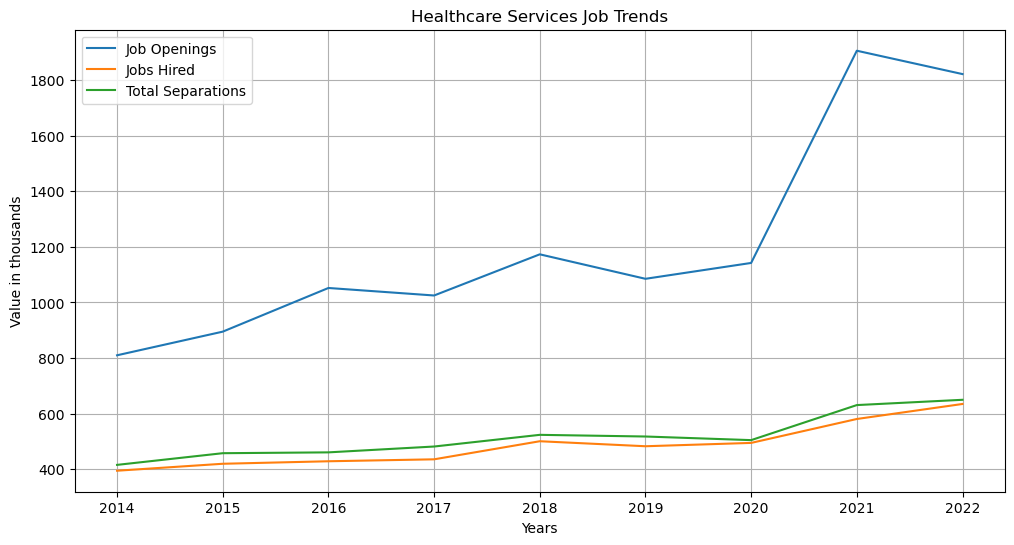

In [64]:
data = {
    'Date': years,
    'Job Openings': openings,
    'Jobs Hired': hired,
    'Total Separations':separations
}

df = pd.DataFrame(data)
df['Job Openings'] = df['Job Openings'].astype(int)
df[ 'Jobs Hired'] = df[ 'Jobs Hired'].astype(int)
df[ 'Total Separations'] = df[ 'Total Separations'].astype(int)
# df.info()
df.set_index('Date', inplace=True)
df.plot(figsize=(12, 6))
plt.title('Healthcare Services Job Trends')
plt.xlabel('Years')
plt.ylabel('Value in thousands')
plt.grid(True)
plt.show()


<Axes: xlabel='2022 National Employment Matrix title'>

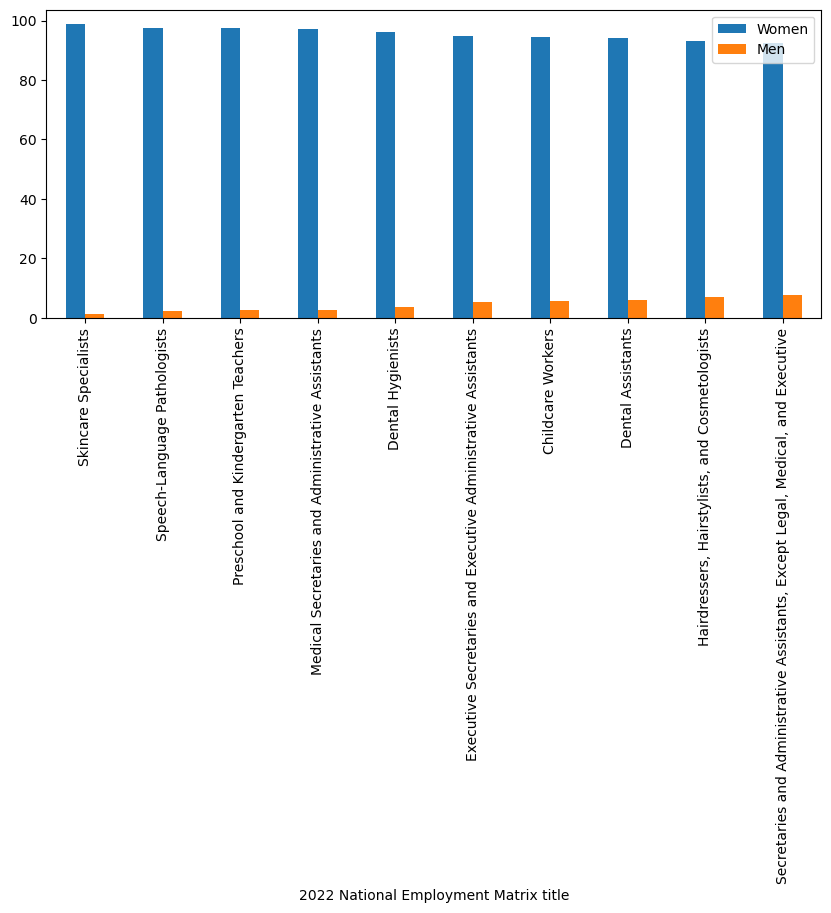

In [65]:

employment_gender = occupation_data_complete[["2022 National Employment Matrix title","Women"]] 
employment_gender = employment_gender.drop(employment_gender[employment_gender["Women"] == '–'].index)
employment_gender = employment_gender.dropna(axis=0)
employment_gender = employment_gender.fillna(0)
employment_gender["Women"] = employment_gender["Women"].astype(float)
employment_gender["Men"] = 100.0 - employment_gender["Women"] 

top_10 = employment_gender.sort_values("Women",ascending = False).head(10)
top_10.set_index("2022 National Employment Matrix title", inplace = True)
top_10.plot(kind = "bar",figsize=(10,4))


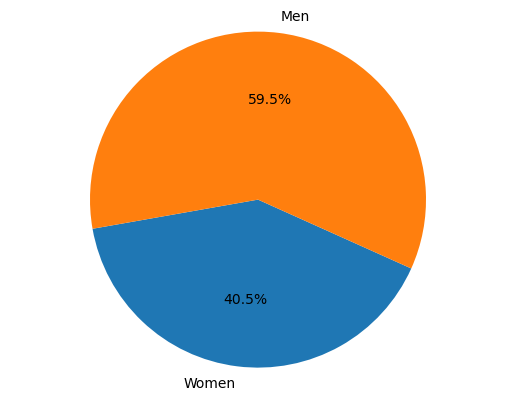

In [66]:
gender_ratio = employment_gender.loc[employment_gender["2022 National Employment Matrix title"] == "Management Occupations"]
# Data for the pie chart
values = [gender_ratio.iloc[0,1], gender_ratio.iloc[0,2]]
labels = ["Women", "Men"]

# Create a pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=190)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

# Display the pie chart
plt.show()


In [67]:
#https://www.bls.gov/emp/graphics/projected-percent-change.htm

In [68]:
#https://www.bls.gov/emp/graphics/